In [371]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris()

In [372]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [373]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df = df.drop(["petal length (cm)","petal width (cm)"],axis="columns")
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


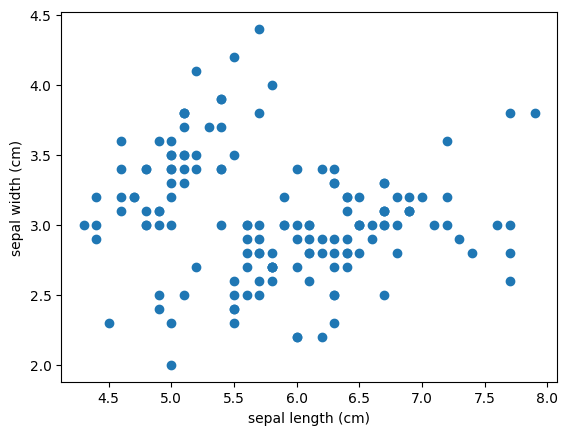

In [374]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df[["sepal length (cm)"]],df[["sepal width (cm)"]])
# plt.scatter(df)

In [375]:
# y_predicted = km.fit_predict(df[["sepal width (cm)","sepal length (cm)"]])
# y_predicted
km = KMeans(n_clusters=3)
# y_predicted = km.fit_predict(df)
y_predicted = km.fit_predict(df[["sepal width (cm)","sepal length (cm)"]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [376]:
df["cluster"] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [377]:
df.cluster.unique()

array([1, 0, 2], dtype=int32)

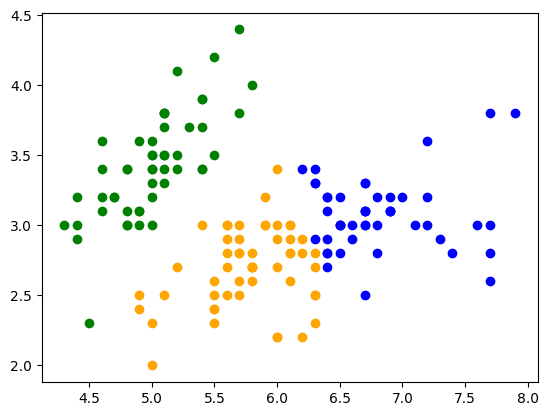

In [378]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1[["sepal length (cm)"]],df1[["sepal width (cm)"]],color="blue")
plt.scatter(df2[["sepal length (cm)"]],df2[["sepal width (cm)"]],color="green")
plt.scatter(df3[["sepal length (cm)"]],df3[["sepal width (cm)"]],color="orange")

In [379]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[["sepal length (cm)"]])
df["sepal length (cm)"] = scaler.transform(df[["sepal length (cm)"]])
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,3.5,1
1,0.166667,3.0,1
2,0.111111,3.2,1
3,0.083333,3.1,1
4,0.194444,3.6,1


In [380]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[["sepal width (cm)"]])
df["sepal width (cm)"] = scaler.transform(df[["sepal width (cm)"]])
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [381]:
km = KMeans(n_clusters=3)
# y_predict = km.fit_predict(df)
y_predict = km.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [382]:
df["cluster"] = y_predict

In [383]:
km.cluster_centers_

array([[0.390625  , 0.26649306],
       [0.67557652, 0.44654088],
       [0.19897959, 0.60459184]])

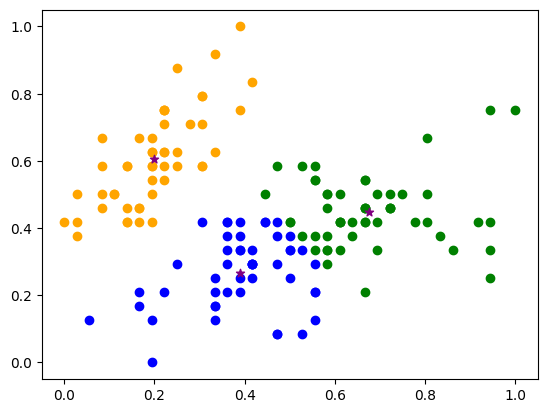

In [384]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
# df4 = df[df.cluster == 3]

plt.scatter(df1[["sepal length (cm)"]],df1[["sepal width (cm)"]],color="blue")
plt.scatter(df2[["sepal length (cm)"]],df2[["sepal width (cm)"]],color="green")
plt.scatter(df3[["sepal length (cm)"]],df3[["sepal width (cm)"]],color="orange")
# plt.scatter(df4[["sepal width (cm)"]],df4[["sepal length (cm)"]],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*", color="purple")

In [391]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["sepal length (cm)","sepal width (cm)"]])
    # km.fit(df[["sepal length (cm)","sepal width (cm)"]])
    sse.append(km.inertia_)

In [392]:
sse

[12.797757201646089,
 6.8552905260332775,
 4.127192770522773,
 3.2741907741836442,
 2.5775537124882586,
 2.0988247629235874,
 1.9354016700856784,
 1.5610815894219126,
 1.3838942764902729]

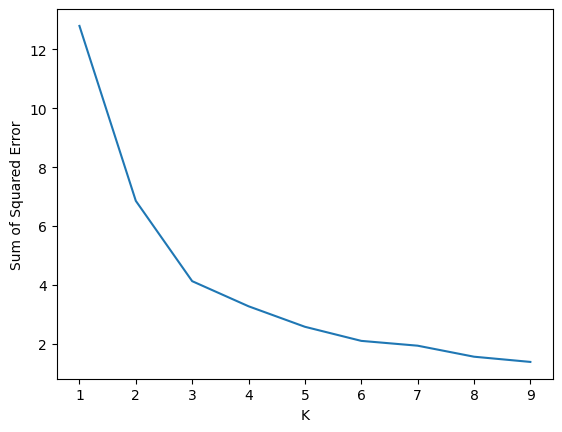

In [393]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)